## Introduction

For the past few days I was learning Python for Data Analysis and I think it's about time to put into a test my new gained knowledge by making a data analysis project. As a beginner data analyst/scientist, my codes may not be efficient or good so please bear with me haha. Anyway, any comments and suggestions will be greatly appreciated!

## About the Dataset

I found this dataset that caught my attention and interest from [Kaggle](https://www.kaggle.com/sidtwr/videogames-sales-dataset). This is a video games sales dataset that is scraped (on Dec., 2016) from [vgchartz](https://www.vgchartz.com/), a website that tracks the sales of physical copies of games for different console/platforms. I found this dataset to be interesting and great to start my first project on.

## About data cleaning and transformation procedures
The data cleaning and transformation procedures is not included in this notebook and I instead placed it in another notebook file which is located in this directory: ./data_cleaning_script.ipynb/ . If you have concerns about the data cleaning and transformation procedures, please refer to this notebook file.

## Importing Libraries

For this project, I used [Pandas](https://pandas.pydata.org/pandas-docs/stable/) mainly for data cleaning, manipulation, and analysis and [Matplotlib](https://matplotlib.org/) for data visualizations:

In [117]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Checking

In [118]:
# Load cleaned dataset:
vg_sales = pd.read_csv('./dataset/vg_sales_cleaned.csv', index_col=0)

In [120]:
# Check first few records:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,North America Sales,Europe Sales,Japan Sales,Others Sales,Global Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [122]:
# Check DataFrame info:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16717 non-null  object 
 1   Platform             16719 non-null  object 
 2   Year_of_Release      16719 non-null  int64  
 3   Genre                16717 non-null  object 
 4   Publisher            16674 non-null  object 
 5   North America Sales  16719 non-null  float64
 6   Europe Sales         16719 non-null  float64
 7   Japan Sales          16719 non-null  float64
 8   Others Sales         16719 non-null  float64
 9   Global Sales         16719 non-null  float64
 10  Critic_Score         8137 non-null   float64
 11  Critic_Count         8137 non-null   float64
 12  User_Score           7590 non-null   float64
 13  User_Count           7590 non-null   float64
 14  Rating               9950 non-null   object 
dtypes: float64(9), int64(1), object(5)
m

To know more about the context of each columns refer to this link: https://www.kaggle.com/sidtwr/videogames-sales-dataset

## Exploratory Data Analysis on Video Games Sales (1980-2016)

These are the questions that I have asked about the data:

* [How the trend for physical video games incline/decline for the past years?](#vg_trend)
* [What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?](#platform_trend)

### <a id='vg_trend'>Sales trend of unique physical copies of video games for different platforms since 1980 to 2016</a>

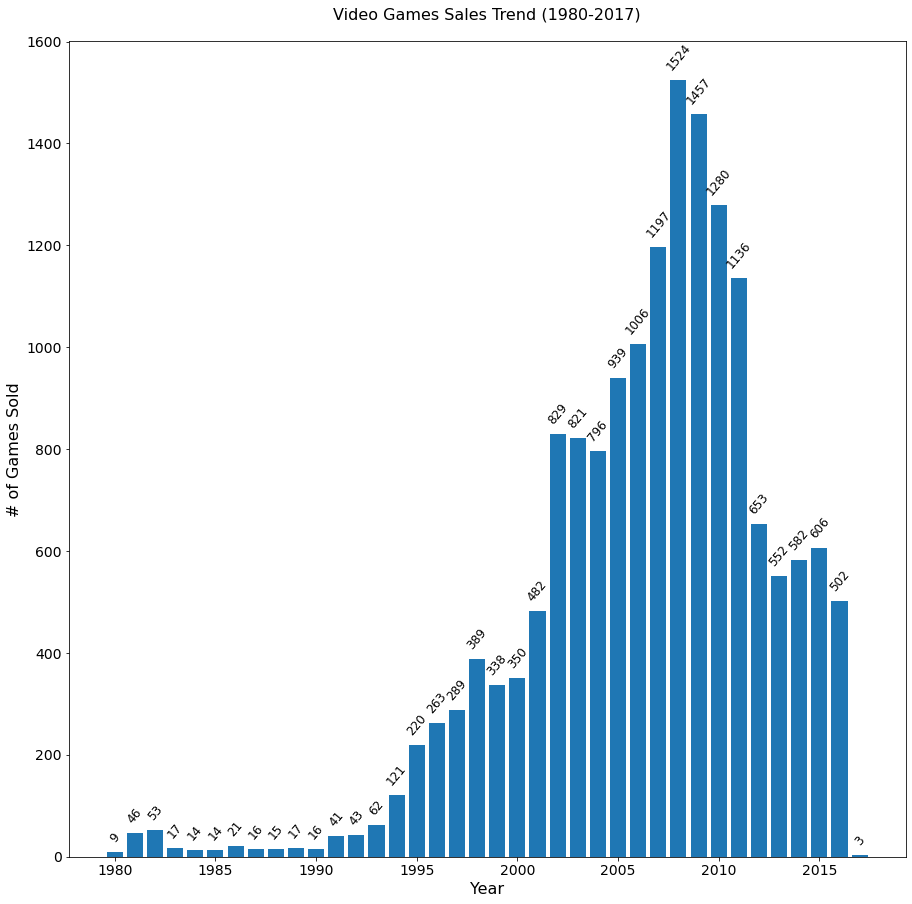

In [193]:
# How the trend for video games grow for the past years?
year_sales_counts = vg_sales['Year_of_Release'].value_counts()
year_sales_counts = year_sales_counts.sort_index()
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(year_sales_counts.index, year_sales_counts.values)
ax.set_title('Video Games Sales Trend (1980-2017)', fontsize=16, y=1.02)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('# of Games Sold', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
s = year_sales_counts
for i in s.index:
    ax.text(i, s.loc[i] + 20, s.loc[i], ha='center', 
            rotation=50, fontsize='large')

In [191]:
# function to compute for percent change
def get_pct_change(prev, new, s):
    pct_change = (s.loc[new] - s.loc[prev]) / s.loc[prev]
    return pct_change * 100

print(f'Percent change from 1980 to 2008: {get_pct_change(1980, 2008, year_sales_counts)}')
print(f'Percent change from 2008 to 2016: {get_pct_change(2008, 2016, year_sales_counts)}')

Percent change from 1980 to 2008: 16833.333333333336
Percent change from 2008 to 2016: -67.06036745406824


**Interpretation:**

From the graph, we can see that the trend for unique physical copies of video games for game platforms started to increase gradually from 1980 to its highest peak on 2008 with percent change of **16,833.33%**.

Also, just after the highest trend peak on 2008 the trend gradually decreased from 1524 physical copies sold to 502 physical copies in 2016 with percent change of **-67.06%**. This decline on trend of physical copies of video games is I believe because of the take over of downloads and that gamers begun to transition away from purchasing physical copies of games towards the digital distributions.

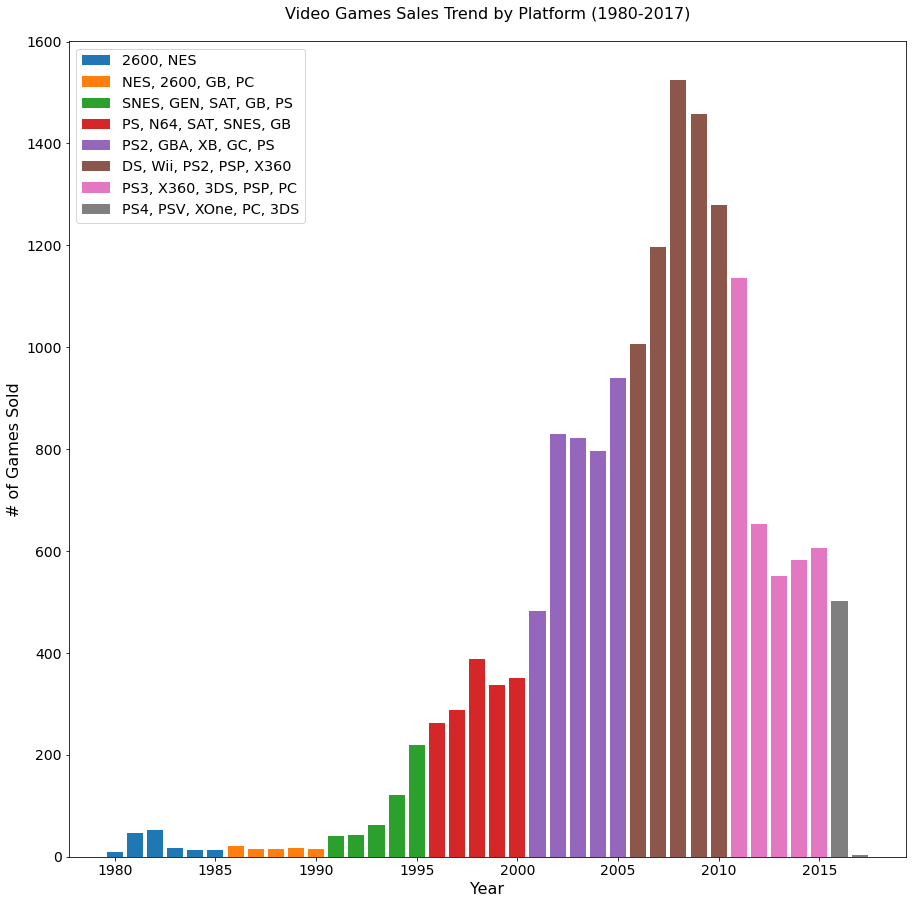

In [194]:
# What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?

# function to get the modal platforms in a given year range
def get_modal_platform(year_range):
    year_range_record = vg_sales[vg_sales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(15, 15))
start, end = 1980, 1985
for i in range(10):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    ax.bar(year_sales_counts.loc[start:end].index,
           year_sales_counts.loc[start:end].values, 
           label=modal_platform)
    start = end + 1
    end = end + 5

ax.set_title('Video Games Sales Trend by Platform (1980-2017)', fontsize=16, y=1.02)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('# of Games Sold', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
_ = ax.legend(fontsize='x-large')

**Interpretation:**

This graph shows which video game platforms dominated the market for a 5-year time period based on what platform a video game is designed to. 

Here we can see that during the highest trend peak on 2005 to 2010 the top 5 modal platforms are: **Nintendo DS, Wii, PS2, PSP, and X360.**

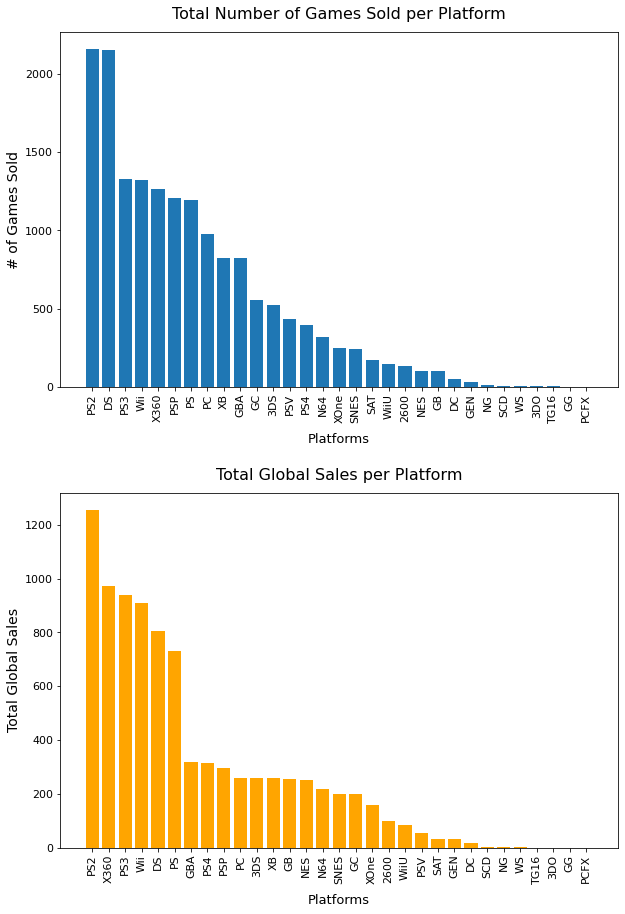

In [11]:
fig, axes = plt.subplots(2, figsize=(10, 15))

# Compute total quantity of vg sold per platform
platform_sales = vg_sales.Platform.value_counts()
platform_sales = platform_sales.sort_values(ascending=False)
axes[0].bar(platform_sales.index, platform_sales.values)
axes[0].set_title('Total Number of Games Sold per Platform', fontsize=16, y=1.02)
axes[0].set_xlabel('Platforms', fontsize=13, labelpad=10)
axes[0].set_ylabel('# of Games Sold', fontsize=14)
axes[0].tick_params(axis='x', labelsize=11, rotation=90)
axes[0].tick_params(axis='y', labelsize=11)

# Compute for total vg global sales for each platform
platform_global_sales = vg_sales.groupby('Platform')['Global_Sales']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
axes[1].bar(platform_global_sales.index, platform_global_sales.values, color='orange')
axes[1].set_title('Total Global Sales per Platform', fontsize=16, y=1.02)
axes[1].set_xlabel('Platforms', fontsize=13, labelpad=10)
axes[1].set_ylabel('Total Global Sales', fontsize=14)
axes[1].tick_params(axis='x', labelsize=11, rotation=90)
axes[1].tick_params(axis='y', labelsize=11)

fig.subplots_adjust(hspace=0.30)

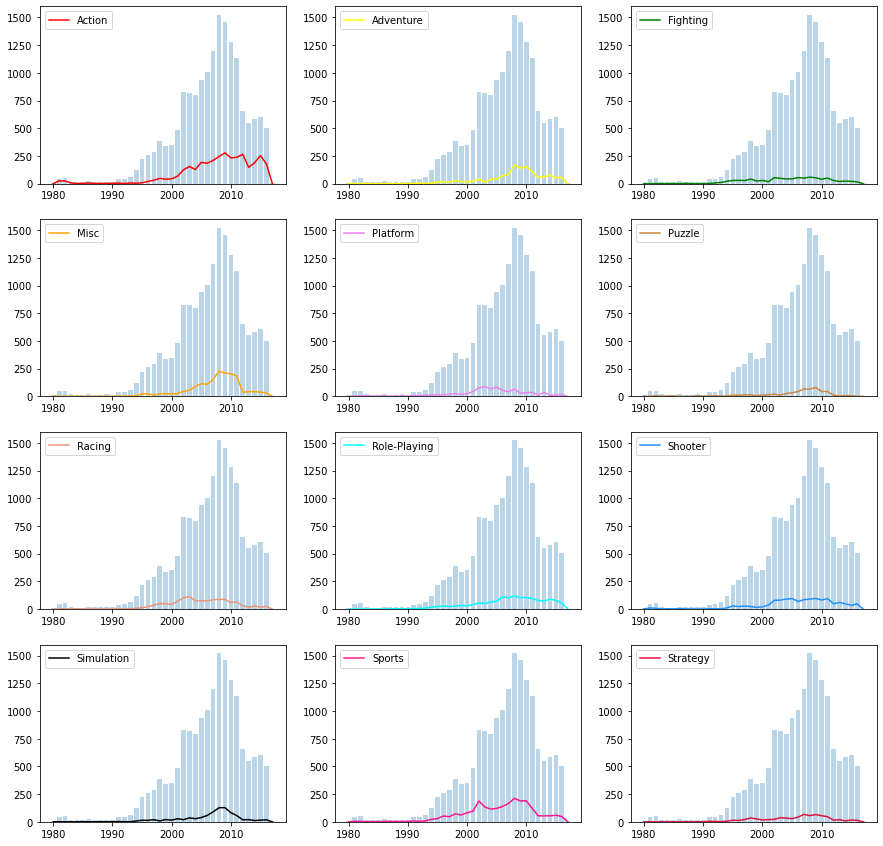

In [61]:
# How is the trend for each Genre grow for the past years?
res = pd.crosstab(vg_sales['Year_of_Release'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

colors_genre = ['red','yellow', 'green', 'orange','violet', 'peru', 
          'darksalmon', 'cyan','dodgerblue','black','deeppink','crimson']

for i in range(4):
    for j in range(3):
        genre_rec = res.iloc[:, i*3+j]
        axes[i, j].bar(year_sales_counts.index, year_sales_counts.values, alpha=0.3)
        axes[i, j].plot(genre_rec, label=genre_rec.name, color=colors[i*3+j])
        _ = axes[i, j].legend(loc='upper left')

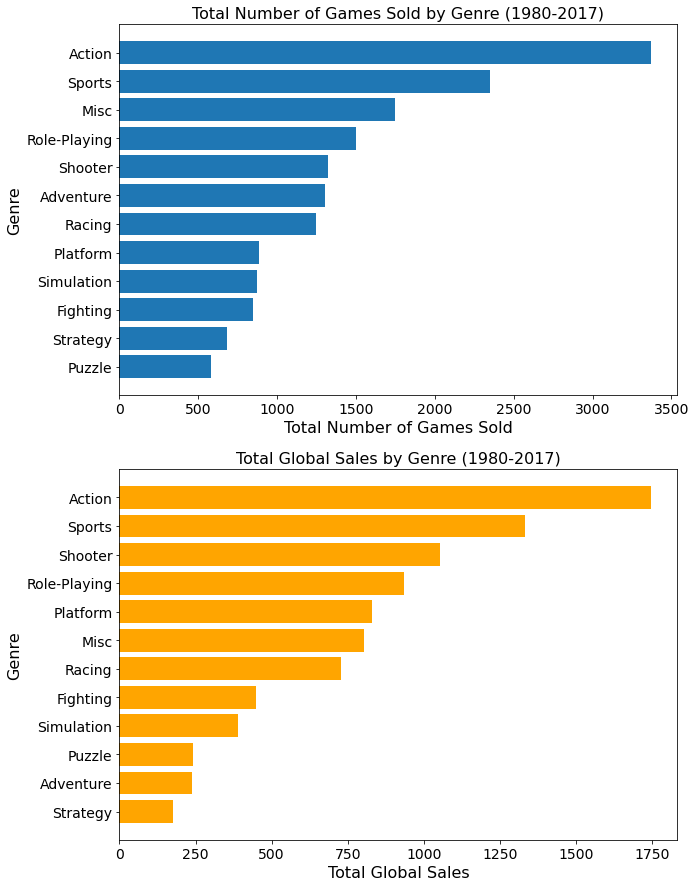

In [60]:
fig, axes = plt.subplots(2, figsize=(10, 15))

# What is the total number of games sold per genre? 
genre_sales = vg_sales.Genre.value_counts()
genre_sales = genre_sales.sort_values()
axes[0].barh(genre_sales.index, genre_sales.values)
axes[0].set_title('Total Number of Games Sold by Genre (1980-2017)', fontsize=16)
axes[0].set_xlabel('Total Number of Games Sold', fontsize=16)
axes[0].set_ylabel('Genre', fontsize=16)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# What is the highest selling genre?
grouped = vg_sales.groupby('Genre')['Global_Sales']
res = grouped.agg('sum').sort_values()
axes[1].barh(res.index, res.values, color='orange')
axes[1].set_title('Total Global Sales by Genre (1980-2017)', fontsize=16)
axes[1].set_xlabel('Total Global Sales', fontsize=16)
axes[1].set_ylabel('Genre', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14) 
axes[1].tick_params(axis='y', labelsize=14)

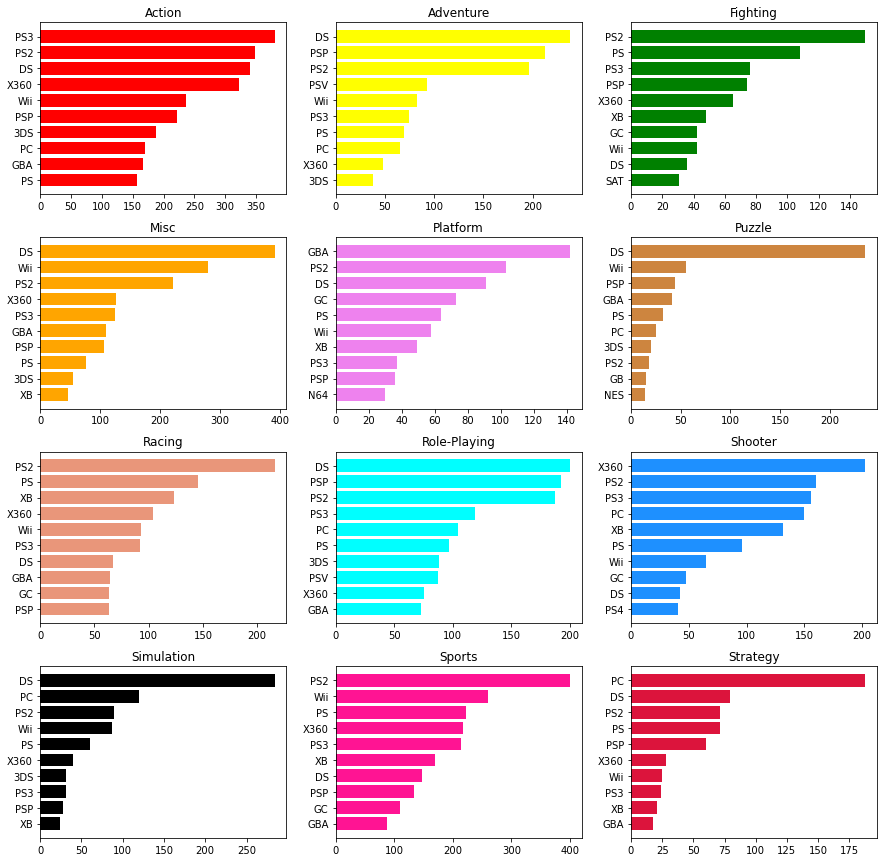

In [70]:
# What are the top 10 modal platforms for each Genre?
res = pd.crosstab(vg_sales['Platform'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i in range(4):
    for j in range(3):
        rec = res.iloc[:, i*3+j].sort_values()[-10:]
        axes[i, j].barh(rec.index, rec.values, color=colors_genre[i*3+j])
        axes[i, j].set_title(rec.name, fontsize=12)
fig.subplots_adjust(hspace=0.25)

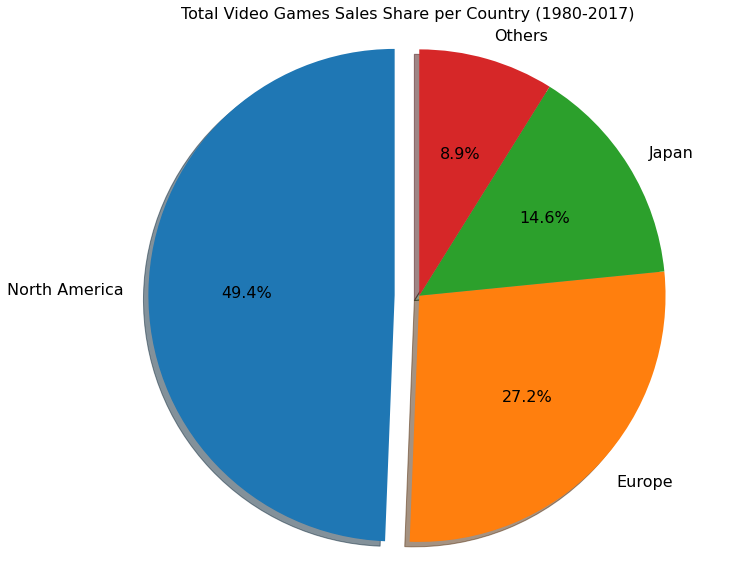

In [15]:
# Total number of video games sold per region (in pct)
region_sales_total = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=0)
region_sales_pct = region_sales_total.div(region_sales_total.sum()) * 100
labels = ['North America', 'Europe', 'Japan', 'Others']
sizes = region_sales_pct.values
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, textprops=dict(fontsize=16))
ax1.axis('equal')
ax1.set_title('Total Video Games Sales Share per Country (1980-2017)', fontsize=16)
plt.show()

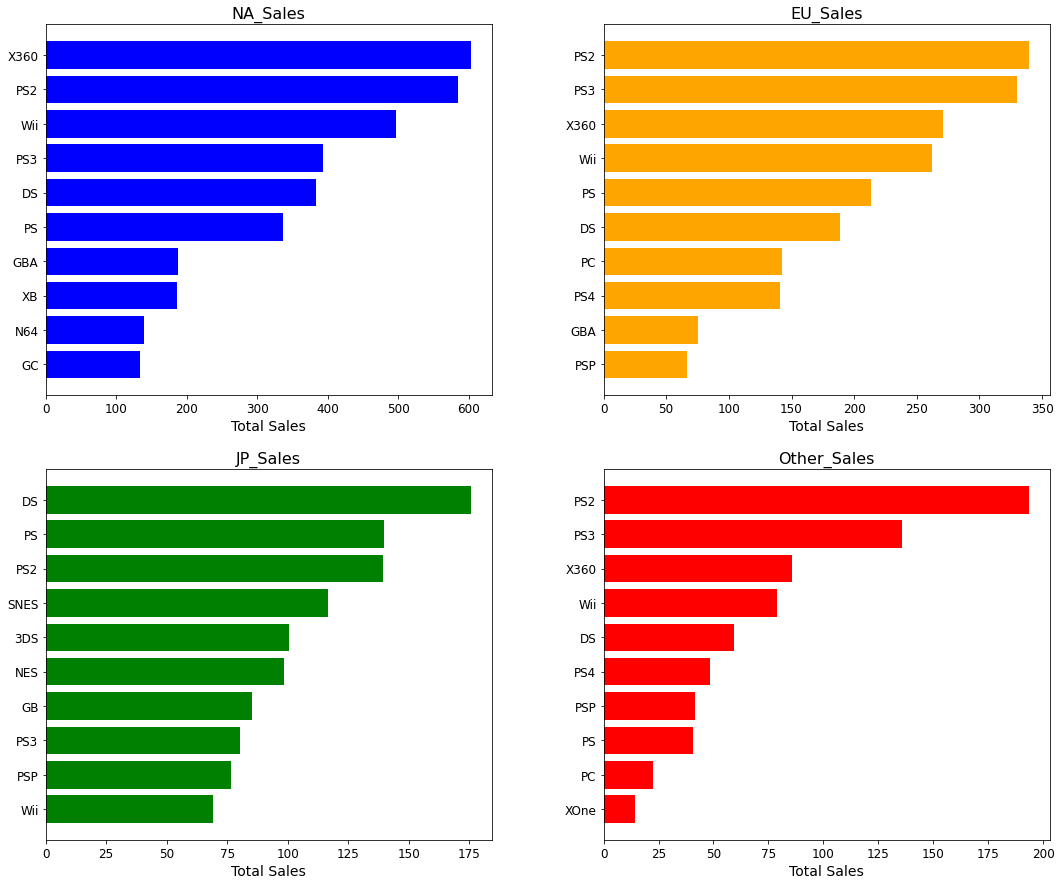

In [95]:
# What are the high selling platforms per region?

grouped = vg_sales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
colors_region = ['blue', 'orange', 'green', 'red']
for i in range(2):
    for j in range(2):
        rec = res.iloc[i*2+j, :].sort_values()[-10:]
        axes[i, j].barh(rec.index, rec.values, color=colors_region[i*2+j])
        axes[i, j].set_title(rec.name, fontsize=16)
        axes[i, j].set_xlabel('Total Sales', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=12)
        axes[i, j].tick_params(axis='y', labelsize=12)  
fig.subplots_adjust(hspace=0.2, wspace=0.25)

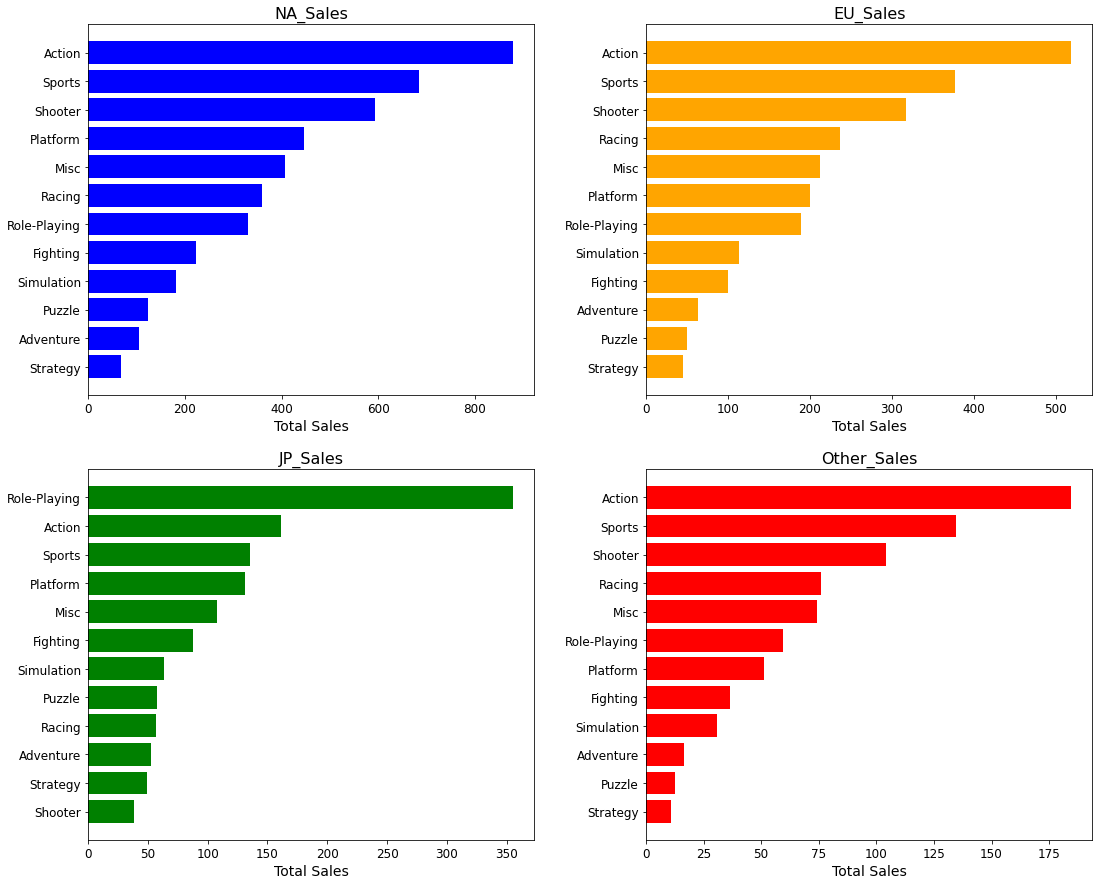

In [94]:
# What is the highest selling genre per region?
grouped = vg_sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
for i in range(2):
    for j in range(2):
        rec = res.iloc[i*2+j, :].sort_values()
        axes[i, j].barh(rec.index, rec.values, color=colors_region[i*2+j])
        axes[i, j].set_title(rec.name, fontsize=16)
        axes[i, j].set_xlabel('Total Sales', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=12)
        axes[i, j].tick_params(axis='y', labelsize=12)
fig.subplots_adjust(hspace=0.2, wspace=0.25)

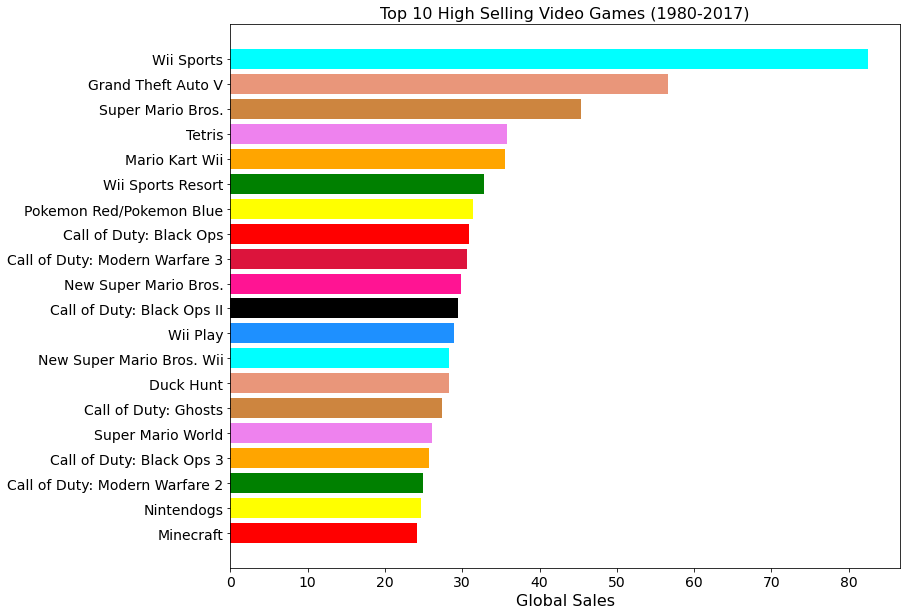

In [106]:
# Top 10 games with highest global sales:
res = vg_sales.groupby('Name')['Global_Sales']
res = res.sum().sort_values()[-20:]
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(res.index, res.values, color=colors_genre)
ax.set_title('Top 10 High Selling Video Games (1980-2017)', fontsize=16)
ax.set_xlabel('Global Sales', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

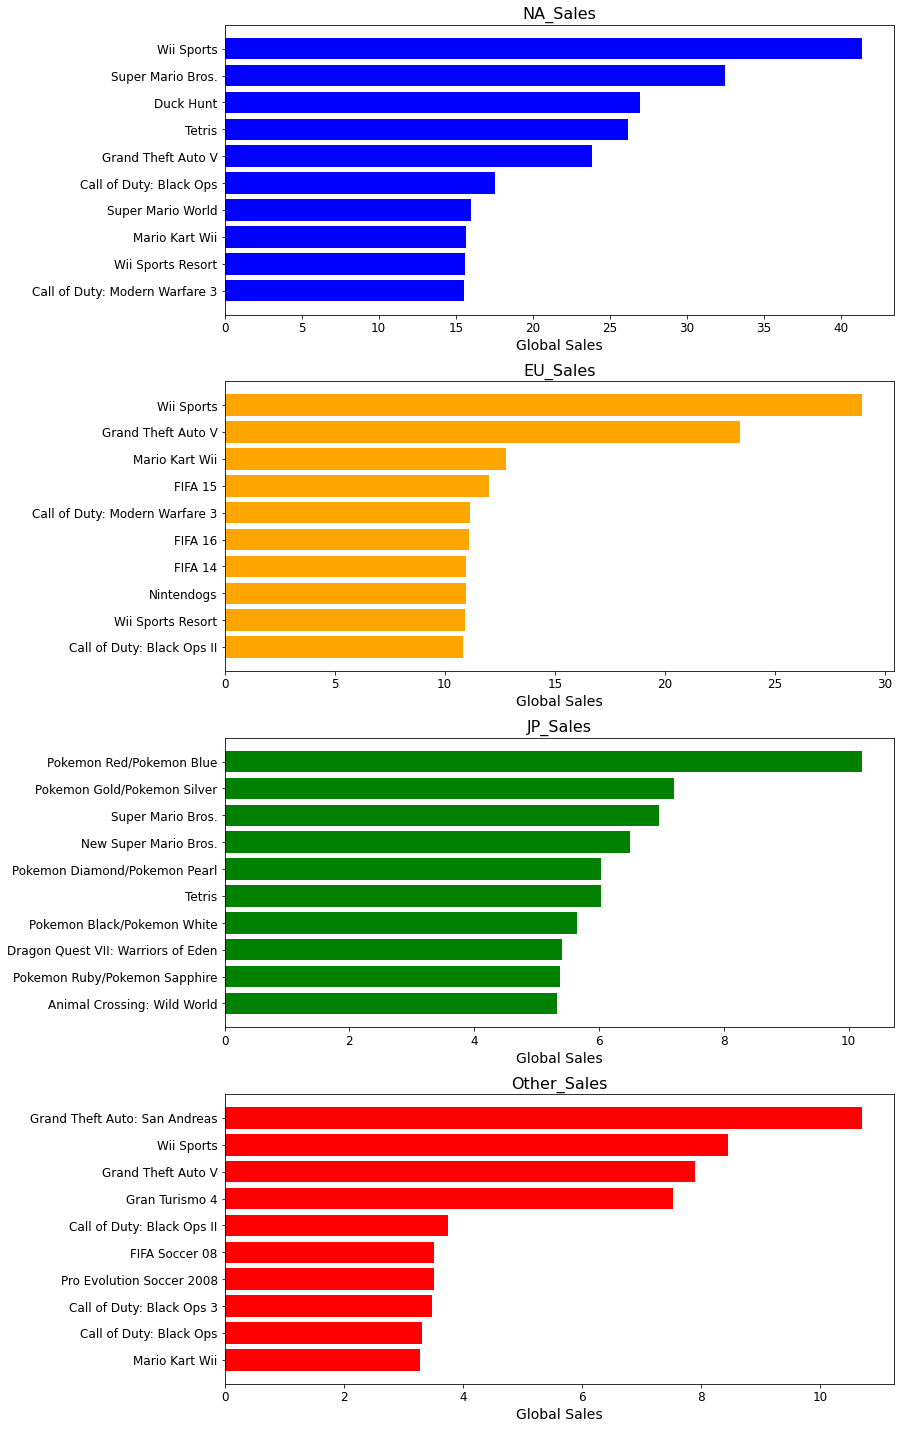

In [105]:
# Top 10 games with highest sales for each region:
res = vg_sales.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = res.sum()
fig, axes = plt.subplots(4, 1, figsize=(12, 25))
for i in range(4):
    rec = res.iloc[:, i].sort_values()[-10:]
    axes[i].barh(rec.index, rec.values, color=colors_region[i])
    axes[i].set_title(rec.name, fontsize=16)
    axes[i].set_xlabel('Global Sales', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
fig.subplots_adjust(hspace=0.23)

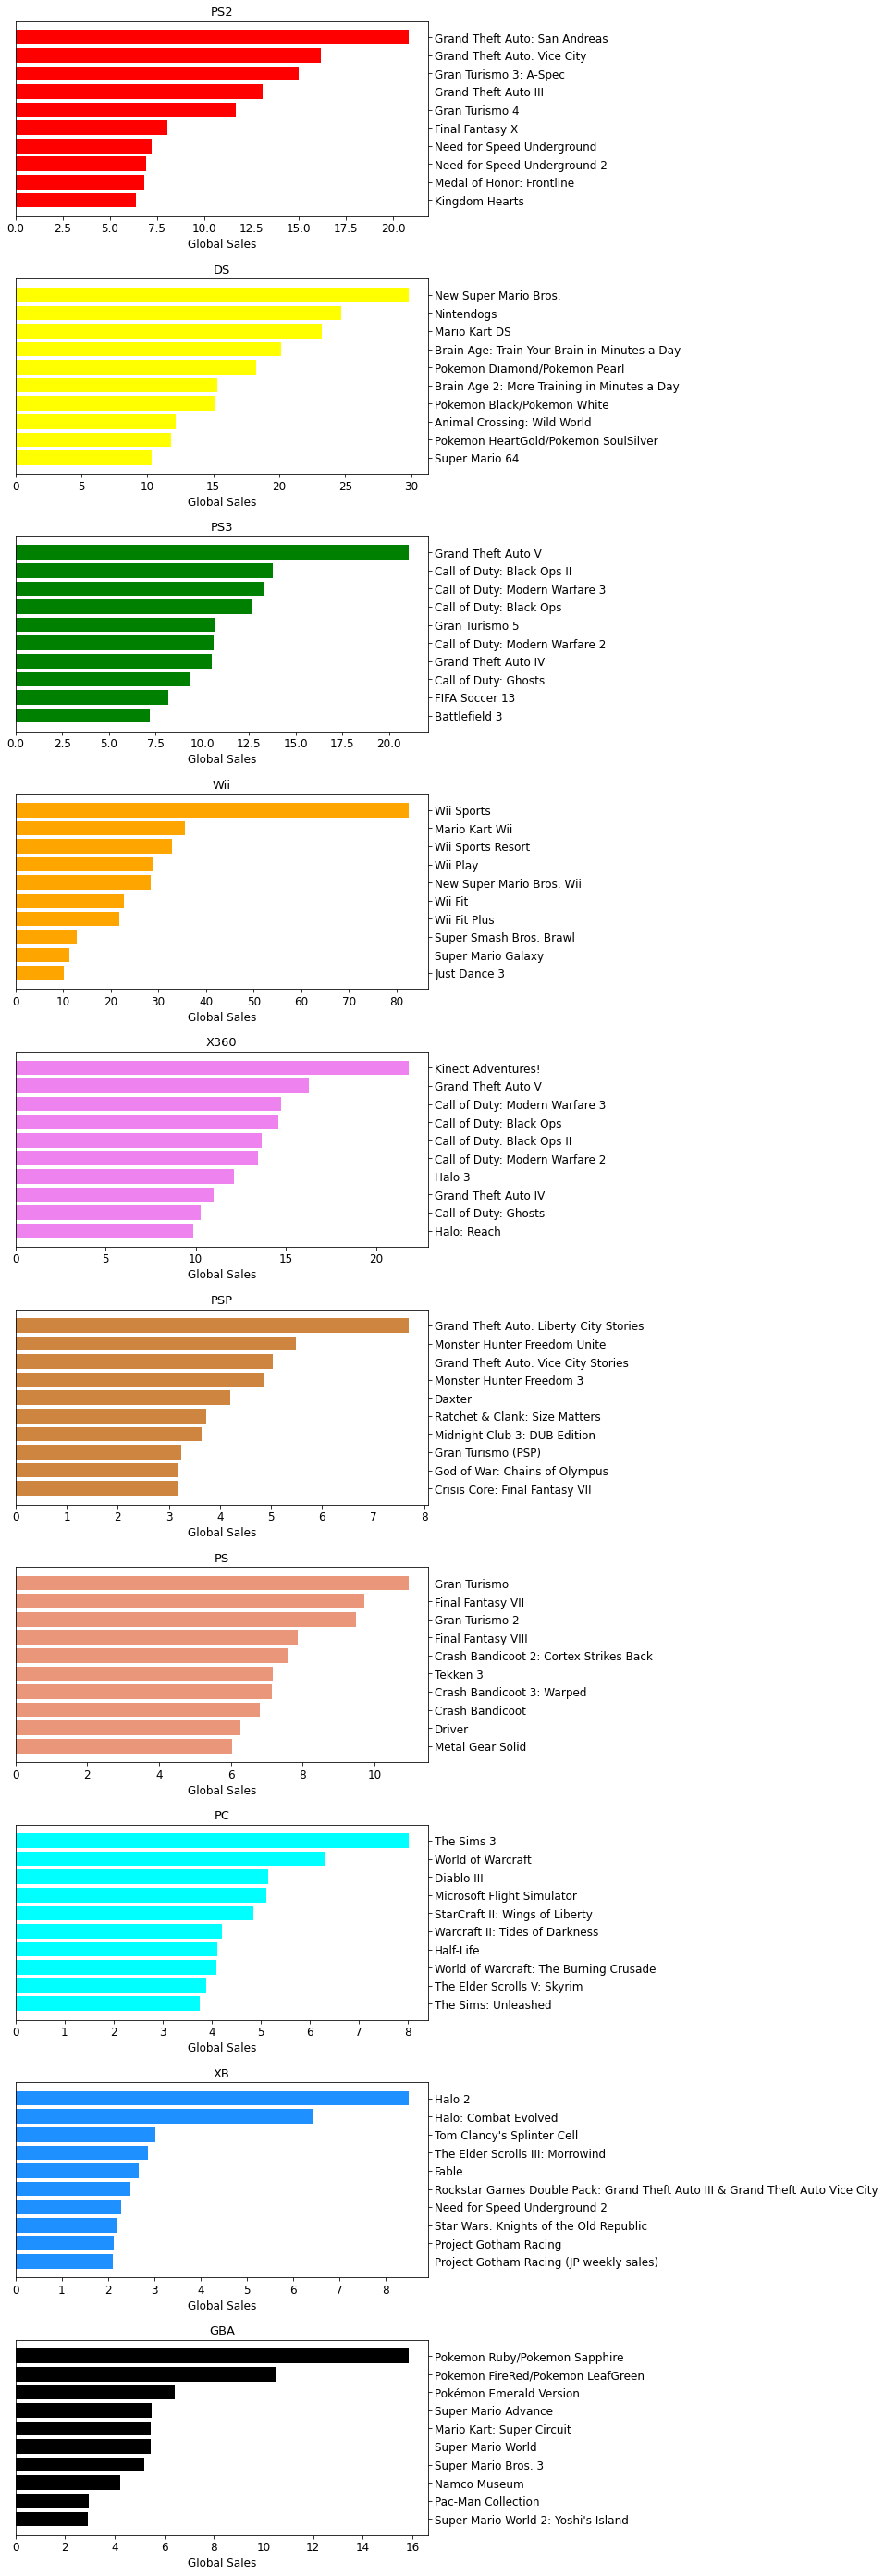

In [111]:
# Top 10 games with highest sales for each platform:
res = vg_sales.groupby('Platform')[['Name', 'Global_Sales']]
res = res.apply(lambda x: x.sort_values('Global_Sales')[-10:])
top_10_platforms = platform_sales.index[:10]
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    rec = res.loc[top_10_platforms[i]]
    axes[i].barh(rec.Name, rec.Global_Sales, color=colors_genre[i])
    axes[i].set_title(top_10_platforms[i], fontsize=13)
    axes[i].set_xlabel('Global Sales', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
fig.subplots_adjust(hspace=0.32)